In [250]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math
%matplotlib inline

## Gaussian distribution
### Generation sample by rolling dices many times

In [225]:
def rollDice():
    return random.randint(1, 6)
    
def generate():
    N = 10000
    trials = {}
    for i in range(N):
        d1 = rollDice()
        d2 = rollDice()
        s = d1 + d2
        trials[s] = trials.get(s, 0) + 1
    return trials

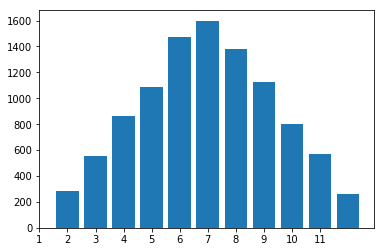

In [226]:
data = generate()
plt.bar(list(data.keys()), list(data.values()))
plt.xticks(range(1, 12))
plt.show()

## Cumulative Distribution

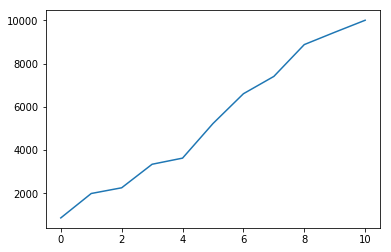

In [228]:
def calcCumulativeDist(data):
    s = {}
    for i, v in enumerate(data.values()):
        s[i] = s.get(i - 1, 0) + v
    return s

def takeSamples(rangeFrom, rangeTo, n):
    return [random.randint(rangeFrom, rangeTo) for i in range(n)]

cumulativDist = calcCumulativeDist(data)

plt.plot(list(cumulativDist.keys()), list(cumulativDist.values()))
plt.show()

# Parameter Estimation
We try to find mean and variance using given data points.

In [212]:
data = generate()
data

{2: 275,
 3: 568,
 4: 828,
 5: 1112,
 6: 1399,
 7: 1666,
 8: 1396,
 9: 1138,
 10: 815,
 11: 550,
 12: 253}

### 1. Finding mean
Mean is simply the average of data points. N is the number of data points.
$$
\mu = \frac{1}{N} \sum_{i}^{N} x_{i} \\
$$

In [213]:
N = np.sum(list(data.values()))

In [214]:
m = sum(k*v for k, v in data.items()) / N
m

6.9828000000000001

### 2. Finding variance
To find the variance we sum the squared differences from the mean. Finally we take the average of the sum. 
$$
\sigma^{2} = \frac{1}{N} \sum_{i}^{N}(x_{i} - \mu)^{2} \\
$$

In [215]:
variance = sum(np.power(k - m, 2) for k, v in data.items() for i in range(v)) / N
variance

5.7667041600002023

# Gaussian (Normal) distribution
Say $ X \in \mathbb{R} $ if `x` is distirbuted Gaussian with mean $\mu$, variance $\sigma^{2}$.
$$
X \sim \mathcal{N}(\mu,\,\sigma^{2})
$$

$$
p(x, \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi } \ \sigma} exp(-\frac{(x-\mu)^{2}}{2\sigma^{2}})  
$$

In [216]:
def calc_p(x, m, variance):
    return 1/ np.sqrt(2*np.pi * np.sqrt(variance)) * np.exp(- np.power(x-m, 2) / 2*variance)

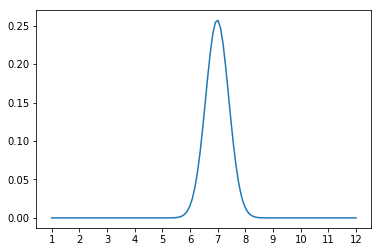

In [222]:
ps = dict((i, calc_p(i, m, variance)) for i in np.linspace(1, 12, 120))

plt.plot(list(ps.keys()), list(ps.values()))
plt.xticks(range(1, 13))
plt.show()

In [218]:
dict((i, calc_p(i, m, variance)) for i in range(1, 13))

{1: 3.8788803574085011e-46,
 2: 2.0897424126511052e-32,
 3: 3.523962956915412e-21,
 4: 1.8600392838703317e-12,
 5: 3.0730179930772096e-06,
 6: 0.015891331753233252,
 7: 0.25722175075408732,
 8: 0.013031886536201498,
 9: 2.066612704133072e-06,
 10: 1.0258009668963748e-12,
 11: 1.593746771096938e-21,
 12: 7.7504645873222998e-33}

### Density Estimation & Cumulative Density Function
What is the probability of rolling two dice whose sum is between 2 and 8? Cumulative distribution function is as follows:
$$
\phi(x, \mu, \sigma) = \frac{1}{2} \ (1 + erf( \frac{x-\mu}{\sigma \sqrt{2}} ) ) 
$$

In [233]:
def cumulativeCDF(x, m, stdv):
    return 0.5 * (1 + math.erf((x-m)/ (stdv * math.sqrt(2)) ))

In [242]:
print(cumulativeCDF(8, m, np.sqrt(variance)))

0.6640664428560954


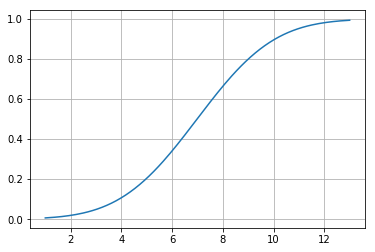

In [249]:
plt.plot(
    np.linspace(1, 13, 130), 
    list(cumulativeCDF(i, m, np.sqrt(variance))  for i in np.linspace(1, 13, 130)))
plt.grid(True)
plt.show()

In [256]:
df = pd.read_csv("data/student/student-mat.csv", ";")
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
294,GP,M,18,R,LE3,T,3,2,services,other,...,5,4,2,1,1,4,8,14,13,14
159,GP,M,16,U,GT3,T,3,3,other,services,...,4,5,5,4,4,5,4,10,12,12
368,MS,F,18,U,GT3,T,2,3,at_home,services,...,5,2,3,1,2,4,0,11,10,10
195,GP,F,17,U,LE3,T,2,4,services,services,...,4,3,2,1,1,5,0,14,15,15
283,GP,F,18,U,GT3,T,1,1,other,other,...,5,4,4,1,1,4,4,8,9,10


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

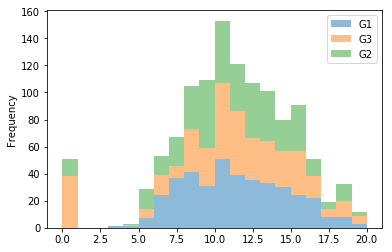

In [322]:
df[["G1", "G3", "G2"]].plot.hist(stacked=True, bins=20,alpha=0.5)

In [313]:
def is_anomoly(g1, g2, g3, df):
    g1_d = df["G1"].describe()
    g2_d = df["G2"].describe()
    g3_d = df["G3"].describe()
    print(g1_d)
    print(g2_d)
    print(g3_d)
    p1 = calc_p(g1, g1_d["mean"], np.power(g1_d["std"], 2))
    p2 = calc_p(g2, g2_d["mean"], np.power(g2_d["std"], 2))
    p3 = calc_p(g3, g3_d["mean"], np.power(g3_d["std"], 2))
    print(p1)
    print(p2)
    print(p3)
    print(np.log(p1)+np.log(p2)+np.log(p3))
is_anomoly(10.908861, 10.713924, 10.415190, df)

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64
count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
0.218974580748
0.20569761857
0.186384134117
-4.78009318289


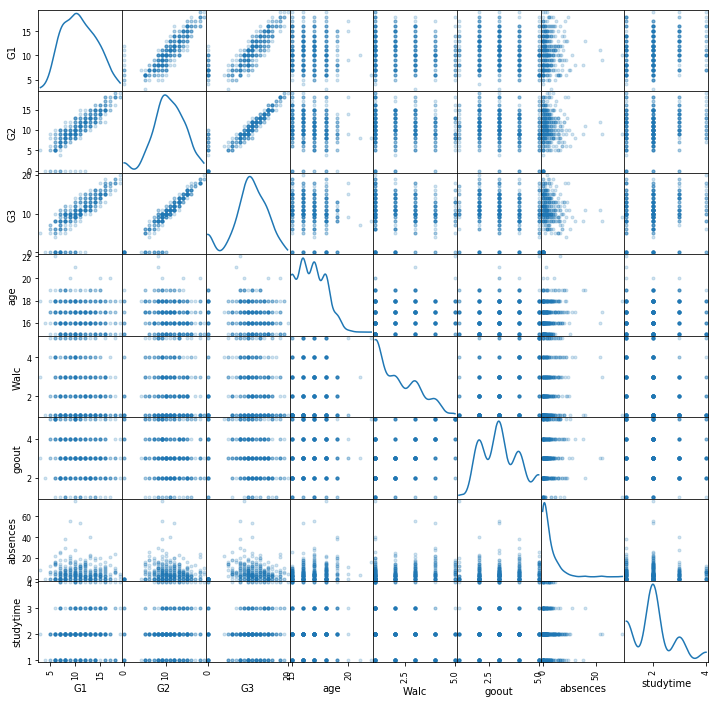

In [334]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[
    ["G1", "G2", "G3", "age", "Walc", "goout", "absences", "studytime","famsize"]], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()